In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [3]:
data = pd.read_excel("D:\\AAA桌面\\class\\time_series\\mpt_source\\mpt_histdata.xlsx", sheet_name= 'DATA')
data.head(5)

,date,reference_start,target_range,field,value
0,2023-03-29,2023-06-21,475bps - 500bps,Rate: 25th percentile,471.21
1,2023-03-29,2023-06-21,475bps - 500bps,Rate: mean,481.98
2,2023-03-29,2023-06-21,475bps - 500bps,Rate: mode,498.33
3,2023-03-29,2023-06-21,475bps - 500bps,Rate: 75th percentile,518.52
4,2023-03-29,2023-06-21,475bps - 500bps,Prob: cut,27.98


In [6]:
rate_mean = data[data['field'] == 'Rate: mean'].copy()
rate_mean = rate_mean.sort_values(by='date')
rate_mean = rate_mean[['date', 'value']]
rate_mean['value'] = pd.to_numeric(rate_mean['value'], errors='coerce')
rate_mean.columns = ['date', 'rate_mean']
rate_mean_daily = rate_mean.groupby('date', as_index = False)['rate_mean'].mean()
rate_mean_daily.columns = ['date', 'rate_mean']
print(rate_mean_daily.head())
print(rate_mean_daily.describe())

         date   rate_mean
0  2023-03-29  358.599167
1  2023-03-30  359.007500
2  2023-03-31  354.236667
3  2023-04-03  345.975833
4  2023-04-04  330.090833
        rate_mean
count  533.000000
mean   395.662561
std     39.887621
min    301.168182
25%    365.050000
50%    398.617273
75%    427.792727
max    476.884545


In [7]:
cut_mean = data[data['field'] == 'Prob: cut'].copy()
cut_mean = cut_mean.sort_values(by = 'date')
print(cut_mean.head(5))
cut_mean = cut_mean[['date', 'value']]
cut_mean['value'] = pd.to_numeric(cut_mean['value'], errors='coerce')
cut_mean.columns = ['date', 'cut_mean']
cut_mean_daily = cut_mean.groupby('date', as_index = False)['cut_mean'].mean()
cut_mean_daily.columns = ['date', 'cut_mean']
print(cut_mean_daily.head())
print(cut_mean_daily.describe())

           date reference_start     target_range      field  value
4    2023-03-29      2023-06-21  475bps - 500bps  Prob: cut  27.98
22   2023-03-29      2023-09-20  475bps - 500bps  Prob: cut  41.48
50   2023-03-29      2023-12-20  475bps - 500bps  Prob: cut  53.79
83   2023-03-29      2024-03-20  475bps - 500bps  Prob: cut  66.72
150  2023-03-30      2023-06-21  475bps - 500bps  Prob: cut  25.88
         date  cut_mean
0  2023-03-29   47.4925
1  2023-03-30   46.0275
2  2023-03-31   46.5150
3  2023-04-03   46.7275
4  2023-04-04   53.3375
         cut_mean
count  533.000000
mean    62.259146
std     23.930688
min     21.685000
25%     39.217500
50%     59.940000
75%     83.622500
max     99.420000


In [8]:
hike_mean = data[data['field'] == 'Prob: hike'].copy()
hike_mean = hike_mean.sort_values(by = 'date')
print(hike_mean.head(5))
hike_mean = hike_mean[['date', 'value']]
hike_mean['value'] = pd.to_numeric(hike_mean['value'], errors='coerce')
hike_mean.columns = ['date', 'hike_mean']
hike_mean_daily = hike_mean.groupby('date', as_index = False)['hike_mean'].mean()
hike_mean_daily.columns = ['date', 'hike_mean']
print(hike_mean_daily.head())
print(hike_mean_daily.describe())

           date reference_start     target_range       field  value
5    2023-03-29      2023-06-21  475bps - 500bps  Prob: hike  45.18
23   2023-03-29      2023-09-20  475bps - 500bps  Prob: hike  45.10
51   2023-03-29      2023-12-20  475bps - 500bps  Prob: hike  35.45
84   2023-03-29      2024-03-20  475bps - 500bps  Prob: hike  26.11
151  2023-03-30      2023-06-21  475bps - 500bps  Prob: hike  50.37
         date  hike_mean
0  2023-03-29    37.9600
1  2023-03-30    40.0975
2  2023-03-31    39.1900
3  2023-04-03    39.0300
4  2023-04-04    33.0225
        hike_mean
count  533.000000
mean    17.367341
std     17.673111
min      0.410000
25%      4.715000
50%      8.445000
75%     31.827500
max     68.902500


In [7]:
print(np.shape(rate_mean_daily))
print(np.shape(cut_mean_daily))
print(np.shape(hike_mean_daily))

(533, 2)
(533, 2)
(533, 2)


In [8]:
# 首先给每列的 value 起个名字
rate_mean_daily = rate_mean_daily.rename(columns={"value": "rate"})
cut_mean_daily = cut_mean_daily.rename(columns={"value": "cut"})
hike_mean_daily = hike_mean_daily.rename(columns={"value": "hike"})

# 按 date 合并
df = pd.merge(rate_mean_daily, cut_mean_daily, on='date', how='outer')
df = pd.merge(df, hike_mean_daily, on='date', how='outer')
df.columns = ['date', 'rate', 'cut', 'hike']
df.head(5)

,date,rate,cut,hike
0,2023-03-29,358.599167,47.4925,37.9600
1,2023-03-30,359.007500,46.0275,40.0975
2,2023-03-31,354.236667,46.5150,39.1900
3,2023-04-03,345.975833,46.7275,39.0300
4,2023-04-04,330.090833,53.3375,33.0225


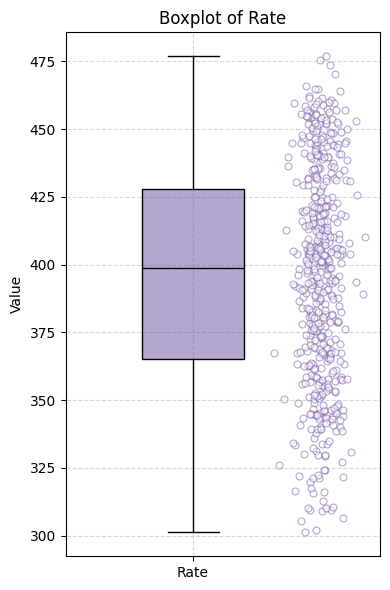

In [9]:
cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#2A7AB9', '#CE4459'], N=3)
box_colors = [cmap(i) for i in range(3)]

plt.figure(figsize=(4, 6))

box1 = plt.boxplot(df['rate'], patch_artist=True, widths=0.4)
box_color = '#6a51a3'

# 设置颜色与样式
box1['boxes'][0].set_facecolor(("#6a51a3", 0.5))  # 设置透明度
box1['boxes'][0].set_edgecolor('black')
box1['medians'][0].set_color('black')

# 加上数据点
x_jitter = np.random.normal(1.5, 0.05, size=len(df))
plt.plot(x_jitter, df['rate'], 'o', color=box_color, alpha=0.5,
         markerfacecolor='white', markeredgewidth=0.8, markersize=5)

plt.title('Boxplot of Rate')
plt.xticks([1], ['Rate'])
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


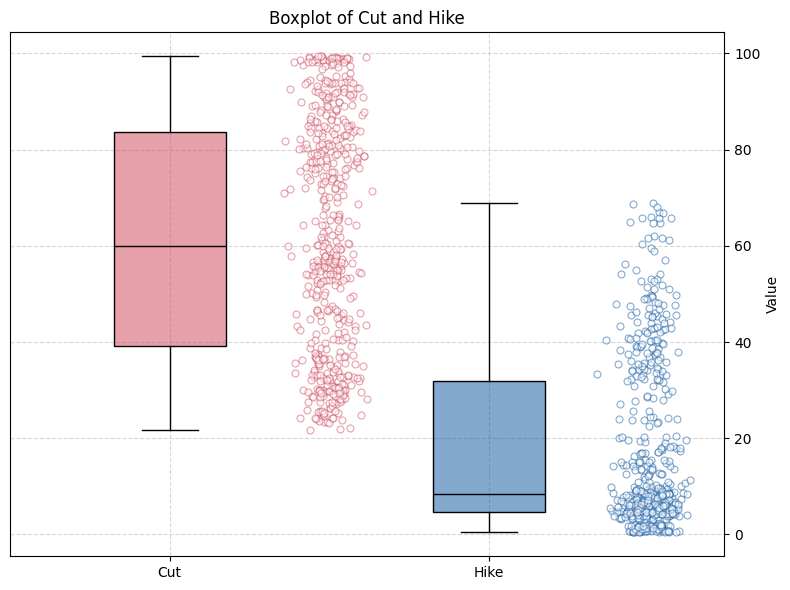

In [11]:
plt.figure(figsize=(8, 6))

box_colors = ['#CE4459', "#0B559F"]  # 自定义两个颜色

box2 = plt.boxplot([df['cut'], df['hike']], patch_artist=True, widths=0.35, positions=[1, 2])

# 设置颜色
for i, patch in enumerate(box2['boxes']):
    patch.set_facecolor(mcolors.to_rgba(box_colors[i], alpha=0.5))
    patch.set_edgecolor('black')
    box2['medians'][i].set_color('black')

# 添加数据点
for i, col in enumerate(['cut', 'hike']):
    x_jitter = np.random.normal(i + 1.5, 0.05, size=len(df))
    plt.plot(x_jitter, df[col], 'o', color=box_colors[i], alpha=0.5,
             markerfacecolor='white', markeredgewidth=0.8, markersize=5)

plt.title('Boxplot of Cut and Hike')
plt.xticks([1, 2], ['Cut', 'Hike'])
plt.ylabel('Value')
ax = plt.gca()  # 获取当前坐标轴对象
ax.yaxis.set_label_position('right')  # 设置y轴标签位置
ax.yaxis.tick_right()                 # 设置刻度也在右侧
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
